# TITANIC SURVIVAL PREDICTION
## First CodSoft DataScience Task

### Importing the necessary libraries

In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Functions

### plot_histogram
The function plot_histogram is designed to perform several tasks related to the visualization and analysis of data within a specified column of a pandas DataFrame. 
Here's what the function does:

1. **Conversion to Numeric Data:** It first converts the specified column to numeric data and calculates the percentage of non-numerical values in the column.

2. **Unique Values:** It retrieves the unique values within the specified column and prints them out.

3. **Percentage Calculation:** It calculates the percentage of occurrence for each unique value in the column and prints out the value along with its percentage.

4. **Histogram Creation:** Using Matplotlib, it creates a histogram based on the unique values and their corresponding percentages. The function allows for custom labeling and sizing for the histogram.

The function essentially helps visualize the distribution of different categories within a specific column and provides insights into the data's composition.

In [260]:
def plot_histogram(df, column_name, total_rows, x_label, x_labels, title, figsize):
    """
    Plot a histogram of percentage distribution for unique values in a given column.

    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    column_name (str): Name of the column to analyze.
    total_rows (int): Total number of rows in the DataFrame.
    x_label (str): Label for the x-axis.
    x_labels (list): Labels for the x-axis ticks.
    title (str): Title of the plot.
    figsize (tuple): Figure size.

    Returns:
    None
    """

    # Convert the column to numeric data
    numeric_data = pd.to_numeric(df[column_name], errors='coerce')
    nan_count = numeric_data.isnull().sum()
    percentage_non_numeric = (nan_count / total_rows) * 100
    print(f"Percentage of non-numerical values in the '{column_name}' column: {percentage_non_numeric:.2f}%")

    # Get unique values in the specified column
    unique_values = df[column_name].unique()
    print(f"Each value in '{column_name}' column:")
    
    # Calculate the percentage of each unique value
    percentage_values = [(df[column_name] == value).sum() / total_rows * 100 for value in unique_values]
    for value, percentage in zip(unique_values, percentage_values):
        print(f"Value of: [{value}] is: {percentage:.2f}%")
        
    # Create a histogram
    plt.figure(figsize=figsize)
    plt.bar(x_labels, percentage_values, color='brown')  # Bar color set to skyblue
    plt.xlabel(x_label)
    plt.ylabel('Each Percentage')
    plt.title(title)
    plt.show()

### calculate_survival_percentages
The function calculate_survival_percentages appears to be designed to analyze survival percentages within a dataset based on a specified feature column. 
Here's what the function does:

1. **Unique Values:** It first retrieves the unique values within the specified column of the dataset.

2. **Percentage Calculation:** It then calculates the percentage of survival for each unique value in the column. It counts the number of occurrences where the "Survived" column has a value of 1 (indicating survival) and divides it by the total count of occurrences for that particular value.

3. **Dictionary Generation:** The function generates a dictionary where the keys are the unique values from the specified column, and the corresponding values are the survival percentages for each unique value.

4. **Return:** The function returns the dictionary containing the calculated survival percentages for the different unique values in the specified feature column.

This function is helpful in understanding the survival rates or percentages based on various categories within a dataset, which is particularly useful in the context of survival analysis or any study involving survival rates in the dataset.

In [261]:
def calculate_survival_percentages(data, feature_column):
    """
    Calculate survival percentages for each unique value in a specified column.

    Parameters:
    data (pd.DataFrame): DataFrame containing the data.
    feature_column (str): Name of the column to analyze.

    Returns:
    dict: A dictionary containing the survival percentages for each unique value.
    """
    # Obtain unique values in the specified column
    unique_values = data[feature_column].unique()
    
    # Initialize an empty dictionary to store survival percentages
    survival_percentages_dict = {}
    
    # Calculate survival percentage for each unique value
    for value in unique_values:
        subset_data = data[data[feature_column] == value]
        survived_count = subset_data["Survived"].sum()
        total_count = len(subset_data)
        if total_count > 0:
            percentage = (survived_count / total_count) * 100
            survival_percentages_dict[value] = percentage
    
    return survival_percentages_dict


### analyze_continuous_variable_survival
The function analyze_continuous_variable_survival is designed to perform the following tasks:

1. **Default Parameters:** If the number of bins or bin labels is not specified, the function sets default values for them.

2. **Binning:** It divides the data into bins based on the specified continuous column using the provided number of bins and labels.

3. **Survival Percentage Calculation:** It calculates the survival percentage for each bin of the continuous variable. It counts the number of occurrences where the "Survived" column has a value of 1 (indicating survival) within each bin and calculates the percentage.

4. **Visualization:** The function generates a bar chart to visualize the calculated survival percentages for each bin of the continuous variable.

5. **Return:** The function returns a dictionary containing the survival percentages for each bin of the continuous variable.

This function is useful for understanding how the survival rate varies across different segments or bins of a continuous variable in the dataset. It provides valuable insights into the relationship between the continuous variable and survival outcomes.

In [262]:
def analyze_continuous_variable_survival(data, column_name, num_bins=None, bin_labels=None):
    """
    Analyze survival rates based on different bins of a continuous variable.

    Parameters:
    data (pd.DataFrame): DataFrame containing the data.
    column_name (str): Name of the continuous column to analyze.
    num_bins (int, optional): Number of bins for segmentation.
    bin_labels (list, optional): Labels for each bin.

    Returns:
    dict: A dictionary containing the survival percentages for each bin of the continuous variable.
    """
    if num_bins is None:
        num_bins = 10  # Set default number of bins if not specified
    
    if bin_labels is None:
        bin_labels = [f'Bin {i+1}' for i in range(num_bins)]  # Set default bin labels
    
    # Segment data into bins based on the specified continuous column
    data['bins'] = pd.cut(data[column_name], bins=num_bins, labels=bin_labels)
    
    # Calculate survival percentages for each bin
    bin_survival_percentages = {}
    
    for bin_label in bin_labels:
        subset_data = data[data['bins'] == bin_label]
        survived_count = subset_data['Survived'].sum()
        total_count = len(subset_data)
        
        if total_count > 0:
            percentage = (survived_count / total_count) * 100
            bin_survival_percentages[bin_label] = percentage
    
    # Remove the 'bins' column from the DataFrame (optional)
    data.drop(columns=['bins'], inplace=True)
    
    # Visualize the survival percentages using a bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(bin_survival_percentages.keys(), bin_survival_percentages.values(), color='skyblue')
    plt.xlabel('Bins')
    plt.ylabel('Survival Percentage (%)')
    plt.title(f'Survival Percentage by {column_name}')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()
    
    return bin_survival_percentages


### visualize_category_percentages_pie_chart
The function visualize_category_percentages_pie_chart is designed to perform the following tasks:

1. **Data Preparation:** It prepares the data for visualization by extracting category labels and corresponding percentage values from the input dictionary.

2. **Color Generation:** It generates shades of red based on the number of categories for use in the pie chart.

3. **Pie Chart Creation:** It creates a pie chart using the category sizes and colors, displaying the distribution of percentages for each category. The function also ensures an equal aspect ratio to draw the pie chart as a circle.

4. **Legend Addition:** The function adds a custom legend to the pie chart, providing labels that include the category name along with the corresponding percentage.

5. **Visualization:** The function displays the pie chart with the custom legend.

This function is useful for visually representing the distribution of percentages across different categories, allowing for a quick and intuitive understanding of the data distribution. In the context of survival analysis or any categorical analysis, this function can be particularly helpful for visualizing the distribution of survival percentages across various categories.

In [263]:
def visualize_category_percentages_pie_chart(percentages_dict):
    """
    Visualize the distribution of percentage values in a pie chart.

    Parameters:
    percentages_dict (dict): A dictionary containing category labels and their corresponding percentage values.

    Returns:
    None
    """
    # Extract category labels and corresponding percentage values
    category_labels = list(percentages_dict.keys())
    category_percentages = list(percentages_dict.values())  # Convert dict_values to a list

    # Generate a list of light red shades for the pie chart
    num_categories = len(category_labels)
    colors = plt.cm.Reds(np.linspace(0.1, 1, num_categories))

    # Set up the figure for the pie chart
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

    # Create the pie chart with percentages and colors
    plt.pie(category_percentages, labels=None, colors=colors, autopct=lambda p: f'{p:.1f}%' if p > 0 else '', startangle=140)
    plt.axis('equal')  # Ensure the pie is drawn as a circle
    plt.title('Distribution of Category Percentages')

    # Add a custom legend with category labels and percentages
    legend_labels = [f'{label} ({category_percentages[i]:.1f}%)' for i, label in enumerate(category_labels) if category_percentages[i] > 0]
    plt.legend(legend_labels, loc='best')

    # Display the pie chart
    plt.show()


### extract_string_between
The function extract_string_between is designed to find and extract a substring from a given string that occurs between two specified markers. Here's a breakdown of what the function does:

1. **Parameters:** It takes in three parameters - the original string (s), the starting marker (start_marker), and the ending marker (end_marker).

2. **Processing:** It attempts to find the indices of the starting and ending markers within the string using the index method.

3. **Substring Extraction:** If both markers are found, it extracts the substring that occurs between these markers using the identified indices. The substring includes the characters immediately following the starting marker up to the character just before the ending marker.

4. **Error Handling:** The function is equipped to handle the situation where one or both markers are not found in the string, in which case it returns an empty string.

5. **Return:** It returns the extracted substring if the markers are found, or an empty string if the markers are not found.

This function is useful for extracting specific segments of text within a larger string based on defined markers, which can be valuable for tasks such as parsing data or extracting specific information from text-based data sources.

In [264]:
def extract_string_between(s, start_marker, end_marker):
    """
    Extracts the substring from a string that occurs between two specified markers.

    Parameters:
    s (str): The input string to search within.
    start_marker (str): The starting marker to identify the beginning of the substring.
    end_marker (str): The ending marker to identify the end of the substring.

    Returns:
    str: The substring found between the two markers. If markers are not found, an empty string is returned.
    """
    try:
        start_index = s.index(start_marker) + len(start_marker)
        end_index = s.index(end_marker, start_index)
        return s[start_index:end_index]
    except ValueError:
        return ""


### calculate_percentage_and_values
The function calculate_percentage_and_values serves the following purposes:

1. **Calculation of Non-Numerical Percentage:** It calculates the percentage of non-numerical values in a specified column of the provided DataFrame. It does this by converting the column to numeric data, counting any occurrences of NaN, and then calculating the percentage of these non-numerical values in the total number of rows.

2. **Identification of Unique Values:** It identifies and prints the unique values in the specified column of the DataFrame.

3. **Calculation of Percentage for Each Unique Value:** It calculates the percentage of occurrence for each unique value in the specified column. This is achieved by counting the occurrences of each unique value and then calculating the percentage of these occurrences in the total number of rows.

4. **Return of Results:** The function returns a list containing the calculated percentages for each unique value in the specified column.

This function is designed to provide insights into the data distribution within a specific column, particularly in terms of the percentage of non-numerical values and the distribution of unique values. It helps in understanding the data characteristics and can be useful for initial data exploration and analysis.

In [265]:
def calculate_percentage_and_values(dataframe, column_name, total_rows):
    """
    Calculate the percentage of non-numerical values and unique value percentages in a specific column.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the data.
    column_name (str): Name of the column to analyze.
    total_rows (int): Total number of rows in the DataFrame.

    Returns:
    list: A list of percentages for each unique value in the specified column.
    """
    # Convert the column to numeric data
    numeric_data = pd.to_numeric(dataframe[column_name], errors='coerce')
    nan_count = numeric_data.isnull().sum()
    percentage_non_numeric = (nan_count / total_rows) * 100
    print(f"Percentage of non-numerical values in the '{column_name}' column: {percentage_non_numeric:.2f}%")

    # Get unique values in the specified column
    unique_values = dataframe[column_name].unique()
    print(f"Unique values in '{column_name}' column:")

    # Calculate the percentage of each unique value
    percentage_values = []
    for value in unique_values:
        count = (dataframe[column_name] == value).sum()
        percentage = (count / total_rows) * 100
        percentage_values.append(percentage)
        print(f"Value: {value}, Percentage: {percentage:.2f}%")

### calculate_null_percentage
The function calculate_null_percentage serves the following purpose:

1. **Total Row Calculation:** It calculates the total number of rows in the provided DataFrame.

2. **Null Percentage Calculation:** It calculates the percentage of null values for each feature (column) in the DataFrame. This is achieved by using the isnull().sum() method to count the number of null values in each column, and then dividing this count by the total number of rows, multiplied by 100 to obtain the percentage.

3. **Return of Results:** The function returns a Pandas Series containing the calculated percentage of null values for each feature in the DataFrame. Each entry in the series corresponds to a feature, with the percentage indicating the proportion of null values in that specific feature.

The function is designed to provide insights into the completeness of data within the DataFrame, helping to identify features that may have significant amounts of missing data. This can be valuable for data quality assessment and data preprocessing tasks.

In [266]:
def calculate_null_percentage(data):
    """
    Calculate the percentage of null values for each feature in a DataFrame.

    Parameters:
    data (pd.DataFrame): The DataFrame containing the data.

    Returns:
    pd.Series: A pandas Series with the percentage of null values for each feature.
    """
    # Calculate the total number of rows in the DataFrame
    total_rows_count = len(data)

    # Calculate the percentage of null values for each feature
    null_percentage_series = (data.isnull().sum() / total_rows_count) * 100

    return null_percentage_series


### extract_ticket_category
The function extract_ticket_category performs the following operations:

1. **Handling of NaN Values:** It checks if the ticket number is missing (NaN). If the ticket number is not provided (NaN), the function returns None to signify the absence of a ticket category.

2. **Ticket Category Extraction:** If the ticket number is not missing, the function checks if there is a space in the ticket number. If a space is found, it splits the ticket number and returns the first part as the ticket category. This assumes that the ticket category is the part of the ticket number before the space.

3. **Default Ticket Category:** If there is no space in the ticket number, the function assumes a default ticket category of 'Normal'.

The function is primarily intended to process ticket numbers, extracting the category information based on certain patterns observed in the ticket number format. It is useful for data preprocessing tasks and feature engineering related to ticket data analysis.

In [267]:
def extract_ticket_category(ticket_number):
    """
    Extract the ticket category from the ticket number.

    Parameters:
    ticket_number (str): The ticket number to analyze.

    Returns:
    str or None: The extracted ticket category if found, or None if the ticket number is NaN.
    """
    if pd.isna(ticket_number):
        return None
    elif ' ' in ticket_number:
        return ticket_number.split(' ')[0]
    else:
        return 'Normal'


### fill_null_with_column_mode
The function fill_null_with_column_mode is responsible for managing missing values within a specific column of a DataFrame. Here's an overview of the function's functionality:

1. **Mode Calculation:** It calculates the mode, which represents the most frequently occurring value, of the specified column in the DataFrame using the mode function. The .iloc[0] syntax retrieves the first element of the resulting Series, which corresponds to the mode value.

2. **Null Value Replacement:** The function replaces any missing values (NaNs) in the specified column with the mode value obtained in the previous step. This operation is performed in-place on the DataFrame using the fillna method.

The primary purpose of this function is to ensure data completeness by handling missing values in a particular column. By utilizing the mode value as the replacement for missing entries, the function offers an effective approach for managing missing values, especially in scenarios involving categorical or discrete data.

In [268]:
def fill_null_with_column_mode(dataframe, column_name):
    """
    Fill missing values in a specific column with the mode value of that column.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the data.
    column_name (str): Name of the column to fill.

    Returns:
    None
    """
    # Calculate the mode of the column
    mode_value = dataframe[column_name].mode().iloc[0]

    # Fill null values with the mode
    dataframe[column_name].fillna(mode_value, inplace=True)


## Load the dataset

In [269]:
data = pd.read_csv('https://raw.githubusercontent.com/OmarHany23/CODSOFT/main/Task1_TITANIC_SURVIVAL_PREDICTION/titanicDataset.csv')


## Visualizing and Preprocessing Data

In [270]:
print(data.head)

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                         

In [271]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [272]:
print(data.info)

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                       

In [273]:
# Define the list of selected features
selected_features = ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived']

# Calculate the percentage of null values for each feature
null_value_percentages = calculate_null_percentage(data[selected_features])

# Display the percentage of null values for each feature
print("Percentage of Null Values for Selected Features Individually:")
print(null_value_percentages, "%")

Percentage of Null Values for Selected Features Individually:
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         20.574163
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.239234
Cabin       78.229665
Embarked     0.000000
Survived     0.000000
dtype: float64 %


In [274]:
# Dropping columns with high null percentages
data.drop(columns=['Cabin', 'Age'], inplace=True)

In [275]:
# Updating the list of selected features to exclude 'Cabin' and 'Age' in one line
selected_features = [feature for feature in selected_features if feature not in ['Cabin', 'Age']]

# Displaying the list of features after the update
print(selected_features)


['Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Survived']


### Selected Features
#### - Sex & Names

Percentage of male Survivals is: 0.00%
Percentage of female Survivals is: 100.00%


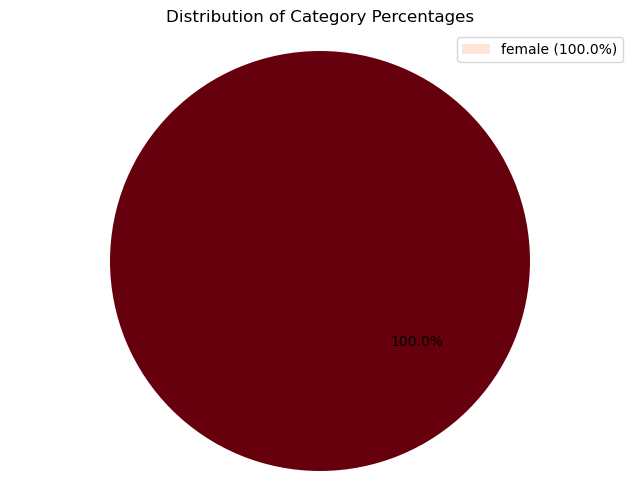

In [276]:
# Calculate the survival percentage based on gender
sex_survival_result = calculate_survival_percentages(data, "Sex")

# Display the survival percentage for each gender
for key, value in sex_survival_result.items():
    print(f"Percentage of {key} Survivals is: {value:.2f}%")

# Visualize the survival percentage using a pie chart
visualize_category_percentages_pie_chart(sex_survival_result)

In [277]:
# Extract titles from the 'Name' column and create a new 'Title' column
data['Title'] = data.apply(lambda row: extract_string_between(row['Name'], ", ", "."), axis=1)

# Add 'Title' to the list of features
selected_features.append('Title')

# Drop the 'Name' column from the DataFrame
data.drop(columns=['Name'], inplace=True)

# Display the 'Title' column
print(data['Title'])


0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Title, Length: 418, dtype: object


In [278]:
# Removing 'Name' from the selected features list
selected_features.remove('Name')

# Printing the updated list of selected features
print(selected_features)


['Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Survived', 'Title']


Percentage of non-numerical values in the 'Title' column: 100.00%
Each value in 'Title' column:
Value of: [Mr] is: 57.42%
Value of: [Mrs] is: 17.22%
Value of: [Miss] is: 18.66%
Value of: [Master] is: 5.02%
Value of: [Ms] is: 0.24%
Value of: [Col] is: 0.48%
Value of: [Rev] is: 0.48%
Value of: [Dr] is: 0.24%
Value of: [Dona] is: 0.24%


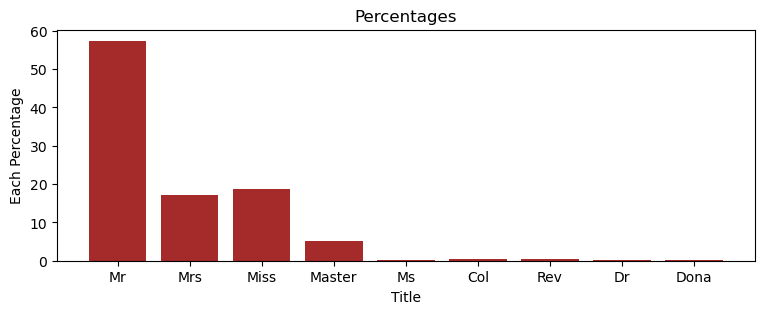

In [279]:
column_name = 'Title'
x_label = 'Title'
title = 'Percentages'
figsize = (9, 3)
x_labels = ['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona']

plot_histogram(data, column_name, len(data), x_label, x_labels, title, figsize)


Percentage of survivors with the title Mr: 0.00%
Percentage of survivors with the title Mrs: 100.00%
Percentage of survivors with the title Miss: 100.00%
Percentage of survivors with the title Master: 0.00%
Percentage of survivors with the title Ms: 100.00%
Percentage of survivors with the title Col: 0.00%
Percentage of survivors with the title Rev: 0.00%
Percentage of survivors with the title Dr: 0.00%
Percentage of survivors with the title Dona: 100.00%


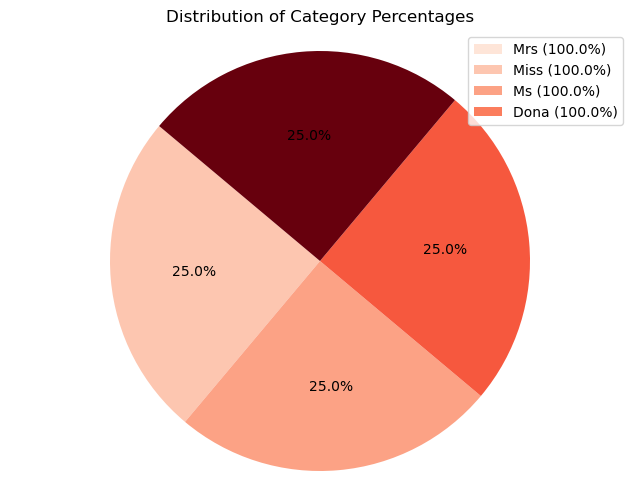

In [280]:
# Calculate survival percentages for each title category
survival_percentages_title = calculate_survival_percentages(data, "Title")

# Display the percentage of survivors for each title category
for key, value in survival_percentages_title.items():
    print(f"Percentage of survivors with the title {key}: {value:.2f}%")

# Visualize the distribution of survival percentages using a pie chart
visualize_category_percentages_pie_chart(survival_percentages_title)


##### All individuals categorized as 'female' in the 'Sex' column survived. 
##### Consequently, this column is not considered relevant for our prediction and has been excluded.

In [281]:
# Remove the 'Title' column from the DataFrame
data.drop(columns=['Title'], inplace=True)

# Remove 'Title' from the list of selected features
selected_features.remove('Title')

# Print the updated list of selected features
print(selected_features)


['Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Survived']


In [282]:
data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,male,0,0,330911,7.8292,Q
1,893,1,3,female,1,0,363272,7.0000,S
2,894,0,2,male,0,0,240276,9.6875,Q
3,895,0,3,male,0,0,315154,8.6625,S
4,896,1,3,female,1,1,3101298,12.2875,S


#### - Embarked

Percentage of non-numerical values in the 'Embarked' column: 100.00%
Each value in 'Embarked' column:
Value of: [Q] is: 11.00%
Value of: [S] is: 64.59%
Value of: [C] is: 24.40%


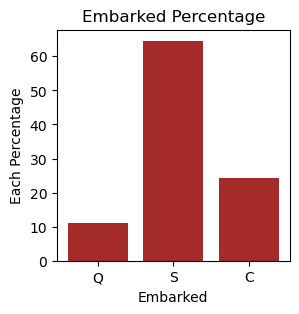

In [283]:
# Define the necessary parameters for the histogram representation
column_name = 'Embarked'  # The column in the dataset to be analyzed
x_label = 'Embarked'  # Label for the x-axis of the histogram
x_labels = ['Q', 'S', 'C']  # Labels for the categories on the x-axis
title = 'Embarked Percentage'  # Title for the histogram
figsize = (3, 3)  # Size of the figure

# Call the histogram representation function with the specified parameters
plot_histogram(data, column_name, len(data), x_label, x_labels, title, figsize)


Percentage of survivors from Q: 52.17%
Percentage of survivors from S: 32.59%
Percentage of survivors from C: 39.22%


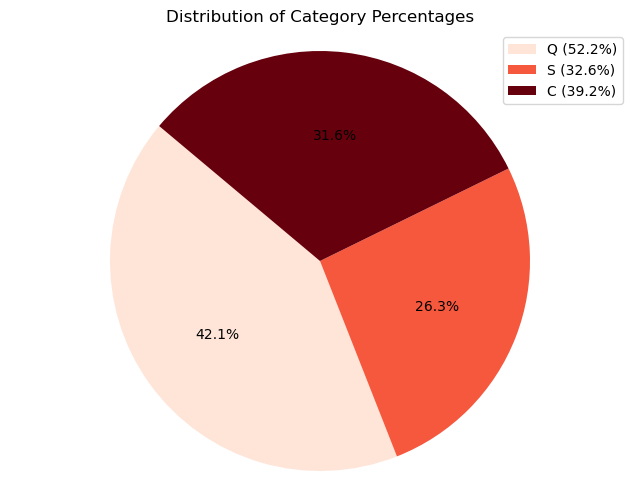

In [284]:
# Calculate the survival percentages based on the embarked locations
embarked_survival_percentages = calculate_survival_percentages(data, "Embarked")

# Display the percentage of survivors for each embarked location
for key, value in embarked_survival_percentages.items():
    print(f"Percentage of survivors from {key}: {value:.2f}%")

# Visualize the distribution of survival percentages using a pie chart
visualize_category_percentages_pie_chart(embarked_survival_percentages)


#### - Pclass

Percentage of non-numerical values in the 'Pclass' column: 0.00%
Each value in 'Pclass' column:
Value of: [3] is: 52.15%
Value of: [2] is: 22.25%
Value of: [1] is: 25.60%


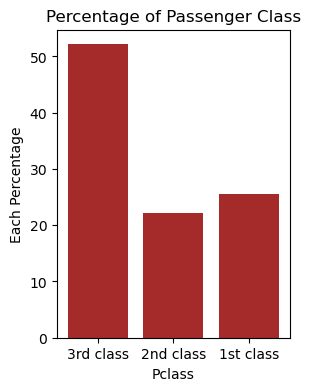

In [285]:
# Define the necessary parameters for the histogram plot
column_name = 'Pclass'  # The column representing the passenger class
x_label = 'Pclass'  # Label for the x-axis of the histogram
x_labels = ['3rd class', '2nd class', '1st class']  # Labels for the categories on the x-axis
title = 'Percentage of Passenger Class'  # Title for the histogram
figsize = (3, 4)  # Size of the figure

# Call the function to plot the histogram
plot_histogram(data, column_name, len(data), x_label, x_labels, title, figsize)


Percentage of survivors from 3 class: 33.03%
Percentage of survivors from 2 class: 32.26%
Percentage of survivors from 1 class: 46.73%


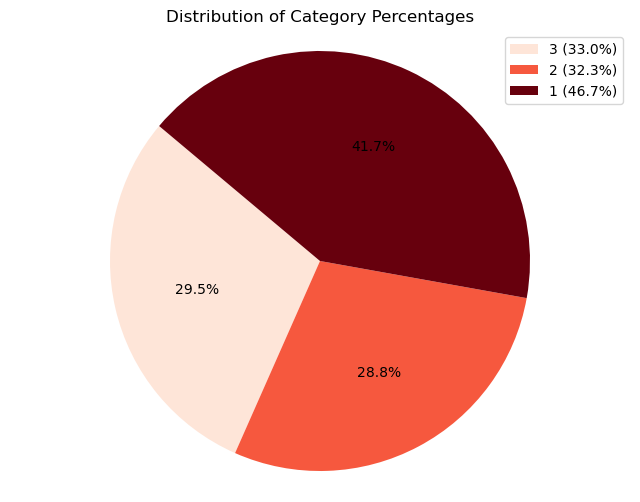

In [286]:
# Calculate the survival percentages based on the passenger class
pclass_survival_percentages = calculate_survival_percentages(data, "Pclass")

# Display the percentage of survivors for each passenger class
for key, value in pclass_survival_percentages.items():
    print(f"Percentage of survivors from {key} class: {value:.2f}%")

# Visualize the distribution of survival percentages using a pie chart
visualize_category_percentages_pie_chart(pclass_survival_percentages)


#### - SibSp

Percentage of non-numerical values in the 'SibSp' column: 0.00%
Each value in 'SibSp' column:
Value of: [0] is: 67.70%
Value of: [1] is: 26.32%
Value of: [2] is: 3.35%
Value of: [3] is: 0.96%
Value of: [4] is: 0.96%
Value of: [5] is: 0.24%
Value of: [8] is: 0.48%


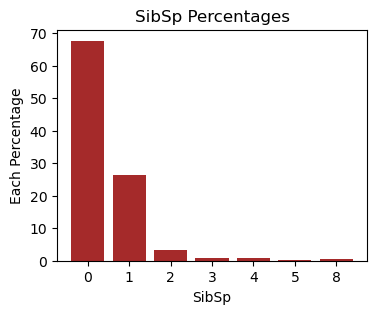

In [287]:
# Define the necessary parameters for the histogram plot
column_name = 'SibSp'  # The column representing the number of siblings/spouses aboard
x_label = 'SibSp'  # Label for the x-axis of the histogram
title = 'SibSp Percentages'  # Title for the histogram
figsize = (4, 3)  # Size of the figure
x_labels = ['0', '1', '2', '3', '4', '5', '8']  # Labels for the categories on the x-axis

# Call the function to plot the histogram
plot_histogram(data, column_name, len(data), x_label, x_labels, title, figsize)


Percentage of survivors with 0 siblings/spouses aboard: 31.10%
Percentage of survivors with 1 siblings/spouses aboard: 49.09%
Percentage of survivors with 2 siblings/spouses aboard: 42.86%
Percentage of survivors with 3 siblings/spouses aboard: 25.00%
Percentage of survivors with 4 siblings/spouses aboard: 25.00%
Percentage of survivors with 5 siblings/spouses aboard: 100.00%
Percentage of survivors with 8 siblings/spouses aboard: 50.00%


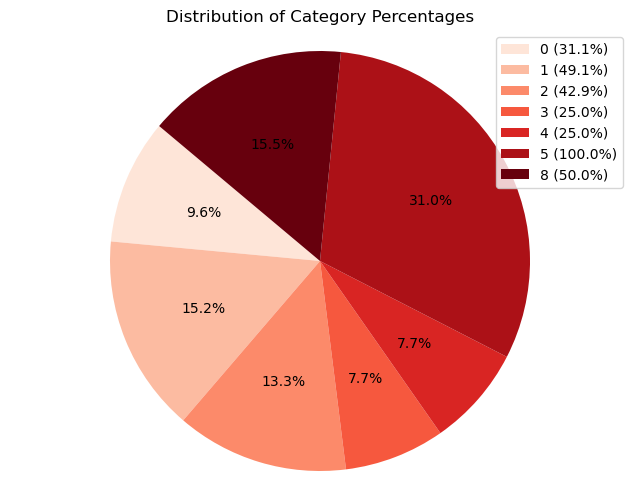

In [288]:
# Calculate the survival percentages based on the number of siblings/spouses aboard
sibsp_survival_percentages = calculate_survival_percentages(data, "SibSp")

# Display the percentage of survivors for each number of siblings/spouses aboard
for key, value in sibsp_survival_percentages.items():
    print(f"Percentage of survivors with {key} siblings/spouses aboard: {value:.2f}%")

# Visualize the distribution of survival percentages using a pie chart
visualize_category_percentages_pie_chart(sibsp_survival_percentages)


#### - Parch

Percentage of non-numerical values in the 'Parch' column: 0.00%
Each value in 'Parch' column:
Value of: [0] is: 77.51%
Value of: [1] is: 12.44%
Value of: [3] is: 0.72%
Value of: [2] is: 7.89%
Value of: [4] is: 0.48%
Value of: [6] is: 0.24%
Value of: [5] is: 0.24%
Value of: [9] is: 0.48%


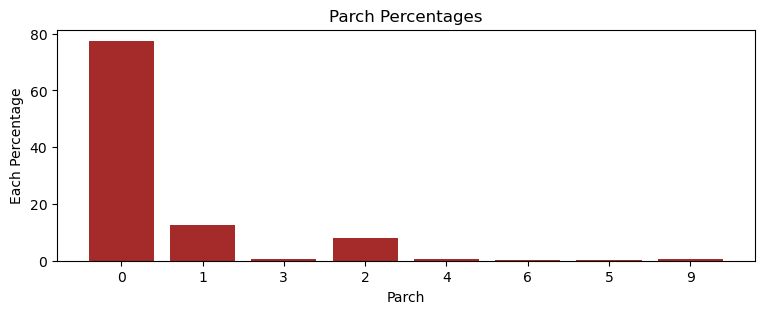

In [289]:
# Define the necessary parameters for the histogram plot
column_name = 'Parch'  # Represents the number of parents/children aboard
x_label = 'Parch'  # Label for the x-axis denoting the number of parents/children aboard
title = 'Parch Percentages'  # Title for the histogram displaying the percentage distribution
figsize = (9, 3)  # Adjusts the size of the figure for visualization
x_labels = ['0', '1', '3', '2', '4', '6', '5', '9']  # Labels for the various categories on the x-axis

# Call the function to plot the histogram with the provided parameters
plot_histogram(data, column_name, len(data), x_label, x_labels, title, figsize)


Percentage of survivors with 0 parents/children aboard: 30.56%
Percentage of survivors with 1 parents/children aboard: 53.85%
Percentage of survivors with 3 parents/children aboard: 66.67%
Percentage of survivors with 2 parents/children aboard: 60.61%
Percentage of survivors with 4 parents/children aboard: 100.00%
Percentage of survivors with 6 parents/children aboard: 0.00%
Percentage of survivors with 5 parents/children aboard: 0.00%
Percentage of survivors with 9 parents/children aboard: 50.00%


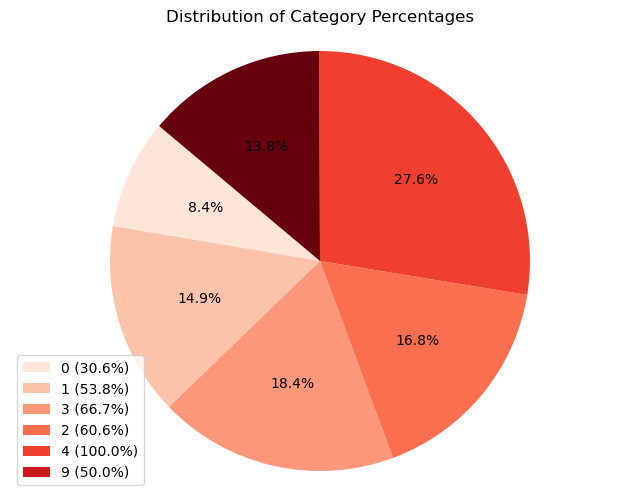

In [290]:
# Calculate the survival percentages based on the number of parents/children aboard
parch_survival_percentages = calculate_survival_percentages(data, "Parch")

# Display the percentage of survivors for each category of parents/children aboard
for key, value in parch_survival_percentages.items():
    print(f"Percentage of survivors with {key} parents/children aboard: {value:.2f}%")

# Visualize the distribution of survival percentages using a pie chart
visualize_category_percentages_pie_chart(parch_survival_percentages)


#### - Ticket

In [291]:
# Split the 'Ticket' column based on the space delimiter and extract the first part as 'Ticket_category'
data['Ticket_category'] = data['Ticket'].str.split(' ').str[0]


In [292]:
# Define the column name for the 'Ticket' column
column_name = 'Ticket'

# Apply the 'extract_ticket_category' function to create the 'Ticket_category' column
data['Ticket_category'] = data[column_name].apply(extract_ticket_category)

# Calculate the percentage of each ticket category using the 'calculate_percentage_and_values' function
calculate_percentage_and_values(data, 'Ticket_category', len(data))


Percentage of non-numerical values in the 'Ticket_category' column: 100.00%
Unique values in 'Ticket_category' column:
Value: Normal, Percentage: 70.81%
Value: A/4, Percentage: 0.72%
Value: W.E.P., Percentage: 0.24%
Value: SC/PARIS, Percentage: 1.44%
Value: STON/O2., Percentage: 0.24%
Value: PC, Percentage: 7.66%
Value: C, Percentage: 0.72%
Value: A/5., Percentage: 0.72%
Value: SC/AH, Percentage: 0.48%
Value: C.A., Percentage: 4.55%
Value: W./C., Percentage: 1.20%
Value: SOTON/O.Q., Percentage: 1.91%
Value: STON/O, Percentage: 0.48%
Value: SC/A.3, Percentage: 0.24%
Value: F.C.C., Percentage: 0.96%
Value: F.C., Percentage: 0.48%
Value: A./5., Percentage: 0.24%
Value: PP, Percentage: 0.24%
Value: STON/OQ., Percentage: 0.24%
Value: SOTON/OQ, Percentage: 0.24%
Value: CA, Percentage: 0.96%
Value: SC/A4, Percentage: 0.24%
Value: S.O./P.P., Percentage: 0.96%
Value: CA., Percentage: 0.96%
Value: S.O.C., Percentage: 0.48%
Value: SOTON/O2, Percentage: 0.24%
Value: AQ/4, Percentage: 0.24%
Value: 

In [293]:
# Drop the 'Ticket' column from the dataframe
data.drop(columns=['Ticket'], inplace=True)

# Remove 'Ticket' from the selected features and add 'Ticket_category' to the selected features
selected_features.remove('Ticket')
selected_features.append('Ticket_category')

# Print the updated selected features
print(selected_features)


['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived', 'Ticket_category']


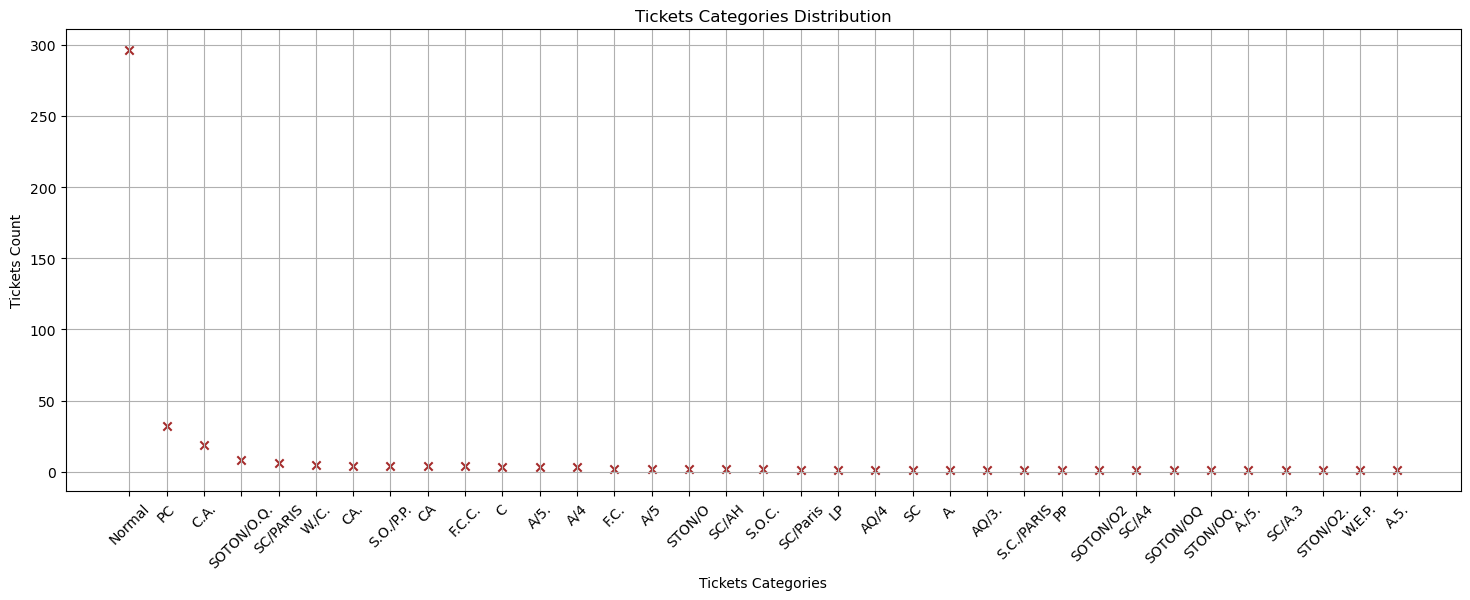

In [294]:
# Calculate the count of each ticket category
ticket_category_counts = data['Ticket_category'].value_counts()

# Extract unique categories and their counts
categories = ticket_category_counts.index
counts = ticket_category_counts.values

# Create a scatter plot to visualize the distribution of ticket categories
plt.figure(figsize=(18, 6))
plt.scatter(categories, counts, c='brown', marker='x')
plt.xlabel('Tickets Categories')
plt.ylabel('Tickets Count')
plt.title('Tickets Categories Distribution')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#### So, an outlier is present.

In [295]:
# Remove the 'Ticket_category' column from the DataFrame and the 'selected_features' list
data.drop(columns=['Ticket_category'], inplace=True)
selected_features.remove('Ticket_category')
# Print the updated list of selected features
print(selected_features)


['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']


#### - Fare

Percentage of non-numerical values in the 'Fare' column: 0.24%
Unique values in 'Fare' column:
Value: 7.8292, Percentage: 0.24%
Value: 7.0, Percentage: 0.48%
Value: 9.6875, Percentage: 0.24%
Value: 8.6625, Percentage: 1.91%
Value: 12.2875, Percentage: 0.24%
Value: 9.225, Percentage: 0.24%
Value: 7.6292, Percentage: 0.24%
Value: 29.0, Percentage: 0.24%
Value: 7.2292, Percentage: 2.15%
Value: 24.15, Percentage: 0.24%
Value: 7.8958, Percentage: 2.63%
Value: 26.0, Percentage: 4.55%
Value: 82.2667, Percentage: 0.48%
Value: 61.175, Percentage: 0.24%
Value: 27.7208, Percentage: 1.44%
Value: 12.35, Percentage: 0.48%
Value: 7.225, Percentage: 2.15%
Value: 7.925, Percentage: 1.20%
Value: 59.4, Percentage: 0.72%
Value: 3.1708, Percentage: 0.24%
Value: 31.6833, Percentage: 0.24%
Value: 61.3792, Percentage: 0.24%
Value: 262.375, Percentage: 1.20%
Value: 14.5, Percentage: 0.96%
Value: 61.9792, Percentage: 0.24%
Value: 30.5, Percentage: 0.24%
Value: 21.6792, Percentage: 0.48%
Value: 31.5, Percentage:

<Axes: xlabel='Fare', ylabel='Density'>

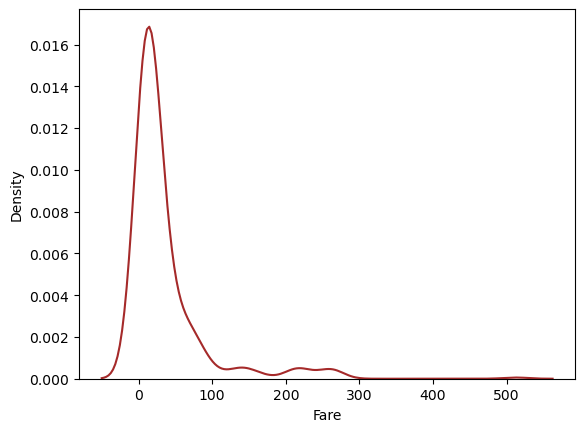

In [296]:
# Calculate the percentage of null values in the 'Fare' column
calculate_percentage_and_values(data, 'Fare', len(data))

# Create a kernel density estimate plot for the 'Fare' column
sns.kdeplot(data=data['Fare'], color='brown')


### PreProcessing

In [297]:
print(data.head)

<bound method NDFrame.head of      PassengerId  Survived  Pclass     Sex  SibSp  Parch      Fare Embarked
0            892         0       3    male      0      0    7.8292        Q
1            893         1       3  female      1      0    7.0000        S
2            894         0       2    male      0      0    9.6875        Q
3            895         0       3    male      0      0    8.6625        S
4            896         1       3  female      1      1   12.2875        S
..           ...       ...     ...     ...    ...    ...       ...      ...
413         1305         0       3    male      0      0    8.0500        S
414         1306         1       1  female      0      0  108.9000        C
415         1307         0       3    male      0      0    7.2500        S
416         1308         0       3    male      0      0    8.0500        S
417         1309         0       3    male      1      1   22.3583        C

[418 rows x 8 columns]>


#### There are non-numerical values. To handle this, we can either use linear regression to predict their values based on other columns or simply drop them.

In [298]:
# Remove the 'Fare' column from the DataFrame
data.drop(columns=['Fare'], inplace=True)

# Update the features list
selected_features.remove('Fare')

# Print the updated features list
print(selected_features)  # Print the updated list of selected features


['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Survived']


In [299]:
print(data.head)

<bound method NDFrame.head of      PassengerId  Survived  Pclass     Sex  SibSp  Parch Embarked
0            892         0       3    male      0      0        Q
1            893         1       3  female      1      0        S
2            894         0       2    male      0      0        Q
3            895         0       3    male      0      0        S
4            896         1       3  female      1      1        S
..           ...       ...     ...     ...    ...    ...      ...
413         1305         0       3    male      0      0        S
414         1306         1       1  female      0      0        C
415         1307         0       3    male      0      0        S
416         1308         0       3    male      0      0        S
417         1309         0       3    male      1      1        C

[418 rows x 7 columns]>


#### Embarked (cabin code)

Percentage of non-numerical values in the 'Embarked' column: 100.00%
Each value in 'Embarked' column:
Value of: [Q] is: 11.00%
Value of: [S] is: 64.59%
Value of: [C] is: 24.40%


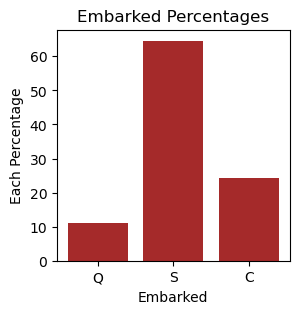

In [300]:
# Define the column name, x-axis label, title, and the size of the figure for the histogram
column_name = 'Embarked'
x_label = 'Embarked'
title = 'Embarked Percentages'
figsize = (3, 3)

# Define the unique labels for the x-axis
x_labels = ['Q', 'S', 'C']

# Use the 'plot_histogram' function to visualize the percentages of embarked values
plot_histogram(data, column_name, len(data), x_label, x_labels, title, figsize)


Survival percentage of Q: 52.17%
Survival percentage of S: 32.59%
Survival percentage of C: 39.22%


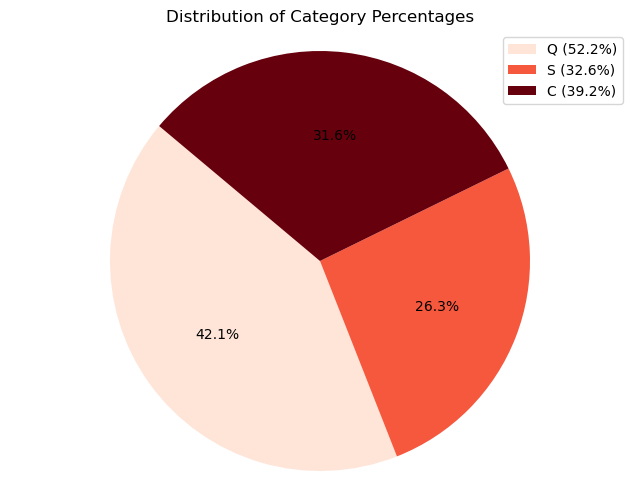

In [301]:
# Compute survival percentages for different 'Embarked' values
embarked_survival_percentages = calculate_survival_percentages(data, "Embarked")

# Print the survival percentages for each category
for key, value in embarked_survival_percentages.items():
    print(f"Survival percentage of {key}: {value:.2f}%")

# Visualize the survival percentages using a pie chart
visualize_category_percentages_pie_chart(embarked_survival_percentages)


In [302]:
# Print the updated selected features list
print(selected_features)


['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Survived']


In [303]:
used_features = ['Pclass', 'Sex', 'SibSp', 'Parch']
# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(selected_features)  # Use one-hot encoding to convert categorical features to numerical


In [304]:
data.head()

,Embarked,Parch,Pclass,Sex,SibSp,Survived
0,False,False,True,False,False,False
1,False,False,False,True,False,False
2,False,False,False,False,True,False
3,False,True,False,False,False,False
4,True,False,False,False,False,False


In [305]:
final_features = data[used_features]
finalS = data['Survived']

In [306]:
final_features.info()
finalS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Pclass  6 non-null      bool 
 1   Sex     6 non-null      bool 
 2   SibSp   6 non-null      bool 
 3   Parch   6 non-null      bool 
dtypes: bool(4)
memory usage: 156.0 bytes
<class 'pandas.core.series.Series'>
RangeIndex: 6 entries, 0 to 5
Series name: Survived
Non-Null Count  Dtype
--------------  -----
6 non-null      bool 
dtypes: bool(1)
memory usage: 138.0 bytes


## Split the data into training and testing sets

In [307]:
# Split the data into training and testing sets
final_features_train, final_features_test, finalS_train, finalS_test = train_test_split(final_features, finalS, test_size=0.2, random_state=1)

In [308]:
# Split the data into training and validation sets
final_features_train, final_features_val, finalS_train, finalS_val = train_test_split(final_features, finalS, test_size=0.2, random_state=1)

In [309]:
# Define a list of models to try
models = [
    ("Random Forest", RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)),
    ("Gradient Boosting", GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=1)),
    ("Logistic Regression", LogisticRegression(random_state=1))
]

best_model = None  # Placeholder for the best model name
best_accuracy = 0.0  # Placeholder for the best accuracy

# Loop through the models and train them
for model_name, model in models:
    print(f"Training {model_name} in Progress...")
    
    # Lists to store train, validation, and test accuracies for each epoch
    train_accuracy_list = []
    val_accuracy_list = []
    test_accuracy_list = []

    # Train the model and track accuracy for each epoch
    for epoch in range(1, 101):  # You can adjust the number of epochs
        model.fit(final_features_train, finalS_train)

        # Make predictions and calculate accuracies
        train_predictions = model.predict(final_features_train)
        val_predictions = model.predict(final_features_val)  # Assuming you have a validation set final_features_val and finalS_val
        test_predictions = model.predict(final_features_test)

        train_accuracy = accuracy_score(finalS_train, train_predictions)
        val_accuracy = accuracy_score(finalS_val, val_predictions)
        test_accuracy = accuracy_score(finalS_test, test_predictions)

        # Store the accuracies for each epoch
        train_accuracy_list.append(train_accuracy)
        val_accuracy_list.append(val_accuracy)
        test_accuracy_list.append(test_accuracy)

    # Print both train and test accuracy for each model
    print(f"{model_name} Overall Train Accuracy {train_accuracy:.2%}")
    print(f"{model_name} Overall Validation Accuracy {val_accuracy:.2%}")
    print(f"{model_name} Overall Test Accuracy {test_accuracy:.2%}")
    print("\n")

    # Check if the current model has the best accuracy
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_model = model_name
        
# Check if all models have similar accuracy
similar_models = all(val == best_accuracy for val in val_accuracy_list)
if similar_models:
    print("The performance of all models is comparable.")
else:
    print(f"The best model is {best_model} with a validation accuracy of {best_accuracy:.2%}")


Training Random Forest in Progress...
Random Forest Overall Train Accuracy 75.00%
Random Forest Overall Validation Accuracy 100.00%
Random Forest Overall Test Accuracy 100.00%


Training Gradient Boosting in Progress...
Gradient Boosting Overall Train Accuracy 75.00%
Gradient Boosting Overall Validation Accuracy 100.00%
Gradient Boosting Overall Test Accuracy 100.00%


Training Logistic Regression in Progress...
Logistic Regression Overall Train Accuracy 75.00%
Logistic Regression Overall Validation Accuracy 100.00%
Logistic Regression Overall Test Accuracy 100.00%


The performance of all models is comparable.


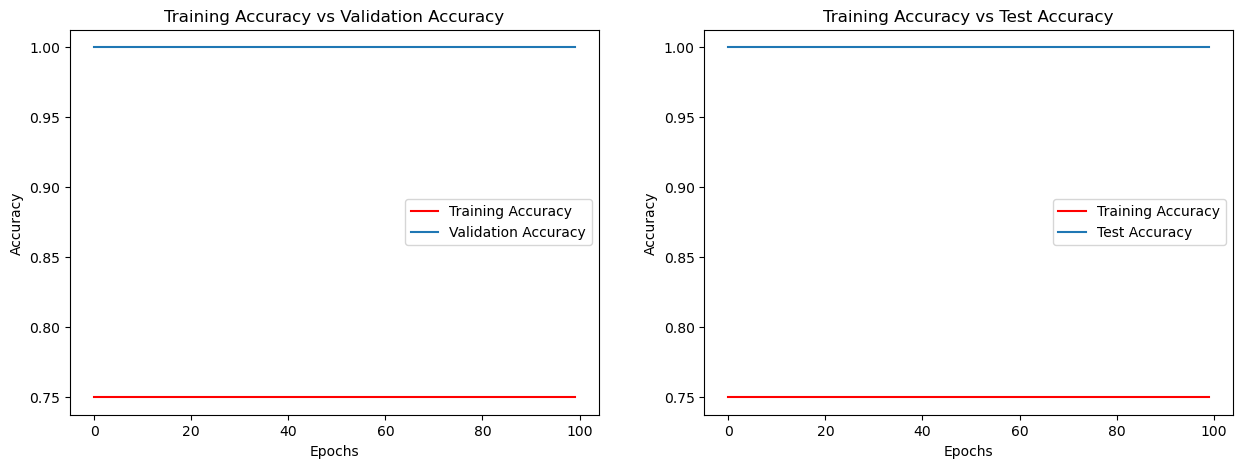

In [310]:
# Plotting train accuracy vs validation accuracy and train accuracy vs test accuracy
plt.figure(figsize=(15, 5))

# Train accuracy vs validation accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracy_list, label='Training Accuracy', c='red')
plt.plot(val_accuracy_list, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.legend()

# Train accuracy vs test accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy_list, label='Training Accuracy', c='red')
plt.plot(test_accuracy_list, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs Test Accuracy')
plt.legend()

plt.show()


Evaluating Random Forest...


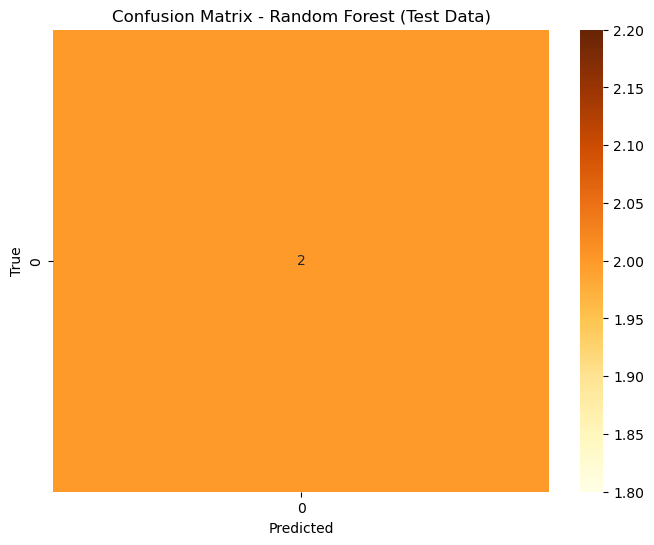

Classification Report for Random Forest - Test Data:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Evaluating Gradient Boosting...


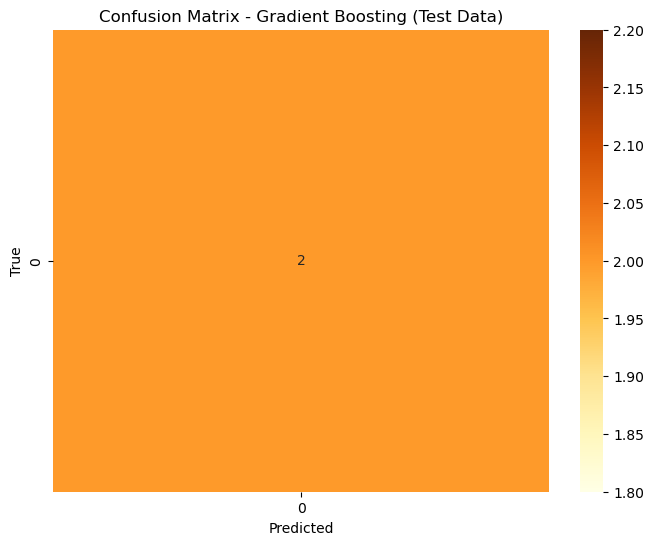

Classification Report for Gradient Boosting - Test Data:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Evaluating Logistic Regression...


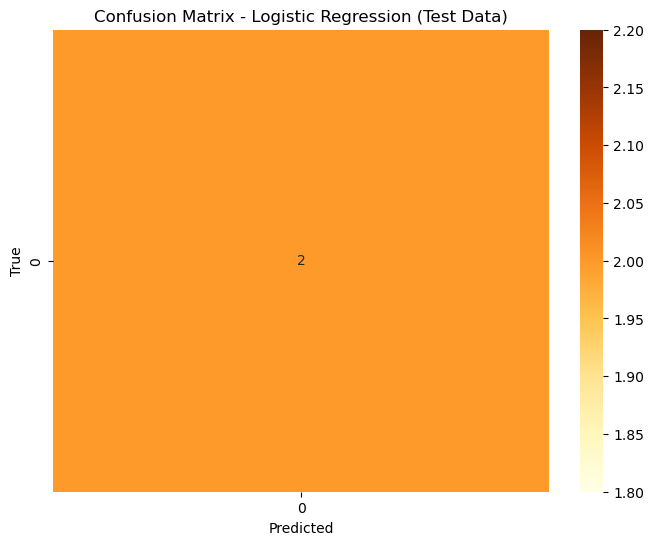

Classification Report for Logistic Regression - Test Data:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [311]:
for model_name, model in models:
    print(f"Evaluating {model_name}...")
    
    # Train the model
    model.fit(final_features_train, finalS_train)

    # Make predictions
    train_predictions = model.predict(final_features_train)
    val_predictions = model.predict(final_features_val)  # Assuming you have a validation set X_val and y_val
    test_predictions = model.predict(final_features_test)

    # Calculate confusion matrix and classification report for train data
    train_cm = confusion_matrix(finalS_train, train_predictions)
    train_cr = classification_report(finalS_train, train_predictions, output_dict=True, zero_division=1)
    
    # Calculate confusion matrix and classification report for validation data
    val_cm = confusion_matrix(finalS_val, val_predictions)
    val_cr = classification_report(finalS_val, val_predictions, output_dict=True, zero_division=1)

    # Calculate confusion matrix and classification report for test data
    test_cm = confusion_matrix(finalS_test, test_predictions)
    test_cr = classification_report(finalS_test, test_predictions, output_dict=True, zero_division=1)
    
    # Display confusion matrix as a heatmap for test data
    plt.figure(figsize=(8, 6))
    sns.heatmap(test_cm, annot=True, fmt="d", cmap="YlOrBr")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name} (Test Data)')
    plt.show()

    # Print classification report for test data
    print(f"Classification Report for {model_name} - Test Data:")
    print(classification_report(finalS_test, test_predictions))
